## **Principal Component Analysis**

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv('Breast_cancer_dataset.csv')

In [32]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [33]:
df.drop(['id','Unnamed: 32'], axis=1, inplace=True)

In [34]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [35]:
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis'].map({'B': 0, 'M': 1})

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=12345, 
                                                    stratify=y)

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [38]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state = 12345)

dt_model.fit(X_train_sc,y_train)

y_predict = dt_model.predict(X_test_sc)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_predict,y_test)

print(accuracy)

0.9298245614035088


In [39]:
# Code here : PCA
from sklearn.decomposition import PCA
sk_pca = PCA()
sk_pca.fit(X_train_sc)

PCA()

In [47]:
sk_pca.explained_variance_ratio_

array([4.38205618e-01, 1.99630596e-01, 8.80652625e-02, 6.89861543e-02,
       5.57617716e-02, 4.09248150e-02, 2.18301215e-02, 1.56033063e-02,
       1.26484690e-02, 1.15952531e-02, 9.81173634e-03, 8.20231492e-03,
       7.62143223e-03, 5.22516126e-03, 3.37814713e-03, 2.70864853e-03,
       1.90135710e-03, 1.54682658e-03, 1.34902700e-03, 1.00842901e-03,
       9.22863387e-04, 8.69387645e-04, 6.33996883e-04, 5.62167783e-04,
       4.48650462e-04, 2.54489192e-04, 2.30690789e-04, 4.37700848e-05,
       2.50423300e-05, 4.49333012e-06])

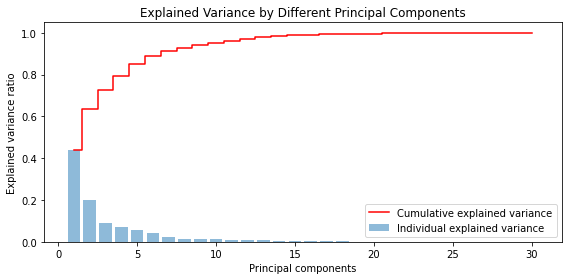

In [48]:
explained_variance = sk_pca.explained_variance_ratio_


plt.figure(figsize=(8, 4))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), where='mid',
         label='Cumulative explained variance',color='red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Explained Variance by Different Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

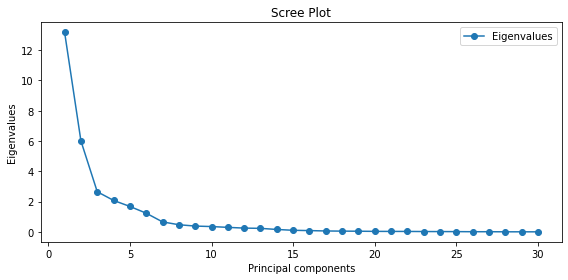

In [49]:
eigenvalues = sk_pca.explained_variance_

# Scree plot
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='-', label='Eigenvalues')
plt.xlabel('Principal components')
plt.ylabel('Eigenvalues')
plt.title('Scree Plot')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [50]:
# code here: PCA with 95% variance
pca = PCA(n_components=0.95)
pca.fit(X_train_sc)

PCA(n_components=0.95)

In [51]:

X_train_pca = pca.transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

In [44]:
X_train_pca.shape

(455, 10)

In [45]:
X_test_pca[0:5,:]

array([[ 2.49710943,  3.89971616, -2.78764557, -0.98223949,  1.21841655,
        -0.32032123, -0.46023239, -0.3084328 , -0.08223853, -0.54971762],
       [-2.70300891, -0.13709859, -0.33338331, -0.08045532,  0.07023034,
         0.17306904, -0.58234744, -0.46901598,  0.4849112 ,  0.29495088],
       [-1.53020638, -0.99410668, -1.37028635, -0.60668061,  0.2616584 ,
         1.59056605,  0.13807993,  0.42157749, -0.02045802,  0.43757749],
       [ 3.35810588, -0.19822189, -2.92897139, -0.79296995,  0.58430295,
        -0.70420858,  1.42335039, -0.45668585,  0.13801876,  0.20964893],
       [-4.35595994, -0.75605398,  0.59119886, -0.51935453, -0.87798494,
        -0.19575617, -0.27395013,  0.11576441, -0.0206674 , -0.73424874]])

In [46]:
dt_pca = DecisionTreeClassifier()
dt_pca.fit(X_train_pca,y_train)
y_predict = dt_pca.predict(X_test_pca)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_predict,y_test)
print(accuracy)

0.9210526315789473


## **Linear Discriminant Analysis**

In [ ]:
# Code here: LDA

In [ ]:
X_train_lda.shape

In [ ]:
# Code here: DecisionTree

In [ ]:
accuracy_score(y_true = y_test, y_pred = dt_lda.predict(X_test_lda))

## **t-Distributed Stochastic Neighbor Embedding (t-SNE)**

In [ ]:
# Code here: TSNE

In [ ]:
X_tsne.shape

In [ ]:
import seaborn as sns
tsne_data = np.vstack((X_tsne.T, y_train)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Plotting the result of t-SNE
sns.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, "Dim_1", "Dim_2").add_legend()
plt.show()